In [1]:
#pandas libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.model_selection import train_test_split
import sklearn.model_selection as modsel
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

%run "../notebooks/cargar_df.ipynb"

In [2]:
train = get_train()

In [3]:
test = get_test()

In [4]:
train.head().T

,0,1,2,3,4
ID,27761,27760,27446,16808,16805
Region,EMEA,EMEA,Americas,Americas,Americas
Territory,None,None,NW America,NW America,NW America
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1
Bureaucratic_Code_0_Approved,1,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,2015-06-16 00:00:00,2015-06-16 00:00:00,2015-04-21 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00
Source,None,None,Source_7,Source_11,Source_11


In [5]:
test.head().T

,0,1,2,3,4
ID,6140,6146,6151,6118,6124
Region,EMEA,EMEA,EMEA,EMEA,EMEA
Territory,Germany,Germany,Germany,Germany,Germany
"Pricing, Delivery_Terms_Quote_Appr",1,1,1,1,1
"Pricing, Delivery_Terms_Approved",1,1,1,1,1
Bureaucratic_Code_0_Approval,1,1,1,1,1
Bureaucratic_Code_0_Approved,1,1,1,1,1
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4
Account_Created_Date,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00
Source,Source_7,Source_7,Source_7,Source_7,Source_7


In [6]:
train = train[train.Stage.isin(['Closed Won', 'Closed Lost'])].copy()
train.shape

(16883, 47)

In [7]:
train.Stage.value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

In [8]:
# Me quedo con los registros con la oportunidad terminada
train.Stage.replace({'Closed Won': 1, 'Closed Lost': 0}, inplace=True)

In [9]:
train.Stage.value_counts()

1    9533
0    7350
Name: Stage, dtype: int64

In [10]:
print('Cantidad de opportunity_id de train:',train.Opportunity_ID.nunique())
print('Cantidad de opportunity_id de test:',test.Opportunity_ID.nunique())

Cantidad de opportunity_id de train: 9791
Cantidad de opportunity_id de test: 1567


In [11]:
# Junto el set de train y test en un nuevo data frame data
data = pd.concat([train.drop('Stage', axis=1), test])
data

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,2016-05-01,2016-06-30,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,2016-01-18,2016-01-20,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-25,2016-01-25,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,2018-03-31,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,2018-02-28,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,Bureaucratic_Code_4,2017-06-12,Source_3,...,2019-05-01,2019-05-10,2019-05-01,Q2,2019,0,USD,124740.0,USD,147750.0
2547,15218,Americas,SE America,1,1,0,0,Bureaucratic_Code_4,2018-06-08,None,...,2019-10-01,2019-12-31,2019-10-01,Q4,2019,0,USD,45054.9,USD,45054.9
2548,15224,Americas,SE America,1,1,1,1,Bureaucratic_Code_4,2018-06-08,None,...,2019-10-01,2019-12-31,2019-10-01,Q4,2019,0,USD,100122.0,USD,100122.0
2549,7286,Americas,NE America,1,1,0,0,Bureaucratic_Code_4,2018-08-29,None,...,2019-08-01,2019-08-01,2019-08-01,Q3,2019,0,USD,143220.0,USD,143220.0


Armo otro data frame con las columnas que no cambian de valor en la misma oportunidad con distintas Ids

In [12]:
grouped_data = data.groupby('Opportunity_ID').agg(\
    {'Region':'first',
     'Territory':'first',
     'Pricing, Delivery_Terms_Quote_Appr':'first',
     'Pricing, Delivery_Terms_Approved':'first',
     'Bureaucratic_Code_0_Approval':'first',
     'Bureaucratic_Code_0_Approved':'first',
     'Bureaucratic_Code':'first',
     'Account_Created_Date':'first',
     'Source ':'first',
     'Billing_Country':'first',
     'Account_Name':'first',
     'Opportunity_Name':'first',
     'Account_Owner':'first',
     'Opportunity_Owner':'first',
     'Account_Type':'first',
     'Opportunity_Type':'first',
     'Quote_Type':'first',
     'Delivery_Terms':'first',
     'Opportunity_Created_Date':'first',
     'Brand':'first',
     'Product_Type':'first',
     'Size':'first',
     'Product_Category_B':'first',
     'Price':'first',
     'Currency':'first',
     'Quote_Expiry_Date':'first',
     'Last_Modified_Date':'first',
     'Last_Modified_By':'first',
     'ASP_Currency':'first',
     'Total_Amount_Currency':'first',
     'Total_Taxable_Amount_Currency':'first',
     'Total_Taxable_Amount':'first'}).reset_index()
grouped_data

,Opportunity_ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,ASP_Currency,Total_Amount_Currency,Total_Taxable_Amount_Currency,Total_Taxable_Amount
0,0,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,None,None,None,1/30/2016,2016-06-13,Person_Name_18,EUR,EUR,EUR,5272800.0
1,1,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,None,None,None,1/20/2016,2016-01-15,Person_Name_20,EUR,EUR,EUR,48230.0
2,2,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,None,None,None,9/30/2016,2016-09-29,Person_Name_8,USD,USD,USD,83865.6
3,3,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Product_Category_B_16,0.42,USD,NaT,2018-03-27,Person_Name_8,USD,USD,USD,7421881.5
4,4,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Product_Category_B_16,0.42,USD,6/2/2017,2018-03-27,Person_Name_8,USD,USD,USD,13357192.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,12799,EMEA,Norway,1,1,0,0,Bureaucratic_Code_4,2013-07-27,Source_9,...,None,None,None,4/3/2016,2016-04-01,Person_Name_13,EUR,EUR,EUR,401700.0
11354,12800,Americas,NE America,1,0,0,0,Bureaucratic_Code_5,2014-06-16,None,...,None,None,None,1/15/2016,2016-10-10,Person_Name_13,USD,USD,USD,21332500.0
11355,12801,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,None,None,None,NaT,2016-01-19,Person_Name_13,EUR,EUR,EUR,299715.0
11356,12802,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,2015-10-20,None,...,None,None,None,2/29/2016,2016-01-22,Person_Name_3,USD,USD,USD,0.0


In [13]:
X = pd.DataFrame({'Opportunity_ID':grouped_data.Opportunity_ID})

## Agrego Features

In [14]:
X['Pricing, Delivery_Terms_Quote_Appr'] = grouped_data['Pricing, Delivery_Terms_Quote_Appr']

In [15]:
X['Pricing, Delivery_Terms_Approved'] = grouped_data['Pricing, Delivery_Terms_Approved']

In [16]:
pricing_ok = grouped_data.agg(lambda x: int(x['Pricing, Delivery_Terms_Quote_Appr'] \
              == x['Pricing, Delivery_Terms_Approved']), axis = 1)
pricing_ok 

0        1
1        1
2        1
3        0
4        0
        ..
11353    1
11354    0
11355    1
11356    1
11357    1
Length: 11358, dtype: int64

In [17]:
# Binaria, es 1 si se necesitaba aprobación y se aprobó o si no la necesitaba
# Es 0 si necesitaba aprobacion y no se aprobo
X['pricing_aprobada'] = pricing_ok

X.head()

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada
0,0,1,1,1
1,1,0,0,1
2,2,0,0,1
3,3,1,0,0
4,4,1,0,0


Agrego features binarios Bureaucratic_Code

In [18]:
X['Bureaucratic_Code_0_Approval'] = grouped_data['Bureaucratic_Code_0_Approval']

In [19]:
X['Bureaucratic_Code_0_Approved'] = grouped_data['Bureaucratic_Code_0_Approved']

In [20]:
bureaucratic_ok = grouped_data.agg(lambda x: int(x['Bureaucratic_Code_0_Approval'] \
              == x['Bureaucratic_Code_0_Approved']), axis = 1)
bureaucratic_ok 

0        1
1        1
2        1
3        0
4        0
        ..
11353    1
11354    1
11355    1
11356    1
11357    1
Length: 11358, dtype: int64

In [21]:
# Binaria, es 1 si se necesitaba aprobación y se aprobó o si no la necesitaba
# Si necesitaba aprobacion y no se aprobo es 0
X['bureaucratic_aprobada'] = bureaucratic_ok

X.head()

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada
0,0,1,1,1,1,1,1
1,1,0,0,1,0,0,1
2,2,0,0,1,0,0,1
3,3,1,0,0,1,0,0
4,4,1,0,0,1,0,0


Feature: binaria 1 si hay mas de 1 ID de la oportunidad, 0 si hay solo un registro

In [22]:
ids = data.groupby('Opportunity_ID').ID.count()
ids

Opportunity_ID
0        1
1        1
2        1
3        1
4        1
        ..
12799    1
12800    2
12801    3
12802    1
12803    1
Name: ID, Length: 11358, dtype: int64

In [23]:
group1 = (ids != 1).astype('int8').reset_index()
group1

,Opportunity_ID,ID
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
11353,12799,0
11354,12800,1
11355,12801,1
11356,12802,0


In [24]:
X['amount_ids'] = group1.ID
X.head()

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,amount_ids
0,0,1,1,1,1,1,1,0
1,1,0,0,1,0,0,1,0
2,2,0,0,1,0,0,1,0
3,3,1,0,0,1,0,0,0
4,4,1,0,0,1,0,0,0


Feature: menor anio de creacion de oportunidad 

In [25]:
data.groupby('Opportunity_ID').Delivery_Year.min()

Opportunity_ID
0        2016
1        2016
2        2016
3        2018
4        2018
         ... 
12799    2016
12800    2016
12801    2016
12802    2016
12803    2016
Name: Delivery_Year, Length: 11358, dtype: int16

In [26]:
min_year = data.groupby('Opportunity_ID').Delivery_Year.min().reset_index()

In [27]:
X['min_year'] = min_year.Delivery_Year
X.head()

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,amount_ids,min_year
0,0,1,1,1,1,1,1,0,2016
1,1,0,0,1,0,0,1,0,2016
2,2,0,0,1,0,0,1,0,2016
3,3,1,0,0,1,0,0,0,2018
4,4,1,0,0,1,0,0,0,2018


Feature: cantidad de dias activos

In [28]:
# Calculo la cantidad de dias activos que tuvo cada oportunidad
days = grouped_data['Last_Modified_Date'] - grouped_data['Opportunity_Created_Date']

In [29]:
days.dt.days

0        189
1         39
2        296
3        840
4        840
        ... 
11353    119
11354    311
11355     46
11356     48
11357    298
Length: 11358, dtype: int64

In [30]:
X['active_days'] = days.dt.days
X

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,amount_ids,min_year,active_days
0,0,1,1,1,1,1,1,0,2016,189
1,1,0,0,1,0,0,1,0,2016,39
2,2,0,0,1,0,0,1,0,2016,296
3,3,1,0,0,1,0,0,0,2018,840
4,4,1,0,0,1,0,0,0,2018,840
...,...,...,...,...,...,...,...,...,...,...
11353,12799,1,1,1,0,0,1,0,2016,119
11354,12800,1,0,0,0,0,1,1,2016,311
11355,12801,1,1,1,1,1,1,1,2016,46
11356,12802,1,1,1,1,1,1,0,2016,48


In [31]:
# Me fijo cuantos null hay por columnas
print('Cantidad de nulos por columna')
grouped_data.replace({'None':np.NaN}).isna().sum()

Cantidad de nulos por columna


Opportunity_ID                            0
Region                                    0
Territory                              1959
Pricing, Delivery_Terms_Quote_Appr        0
Pricing, Delivery_Terms_Approved          0
Bureaucratic_Code_0_Approval              0
Bureaucratic_Code_0_Approved              0
Bureaucratic_Code                         0
Account_Created_Date                      0
Source                                 5590
Billing_Country                          27
Account_Name                              0
Opportunity_Name                          0
Account_Owner                             0
Opportunity_Owner                         0
Account_Type                            104
Opportunity_Type                          0
Quote_Type                                0
Delivery_Terms                            0
Opportunity_Created_Date                  0
Brand                                 10449
Product_Type                          10467
Size                            

Paso las columnas con muchos nulos a binario:
    1 si tiene valor y 0 si es nulo

In [32]:
X['has_source'] = (grouped_data['Source '] == 'None').astype('int8')
X['has_brand'] = (grouped_data['Brand'] == 'None').astype('int8')
X['has_product_Type'] = (grouped_data['Product_Type'] == 'None').astype('int8')
X['has_size'] = (grouped_data['Size'] == 'None').astype('int8')
X['has_product_Category_B'] = (grouped_data['Product_Category_B'] == 'None').astype('int8')
X['has_price'] = (grouped_data['Price'] == 'None').astype('int8')
X['has_currency'] = (grouped_data['Currency'] == 'None').astype('int8')
X

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,amount_ids,min_year,active_days,has_source,has_brand,has_product_Type,has_size,has_product_Category_B,has_price,has_currency
0,0,1,1,1,1,1,1,0,2016,189,1,1,1,1,1,1,1
1,1,0,0,1,0,0,1,0,2016,39,1,1,1,1,1,1,1
2,2,0,0,1,0,0,1,0,2016,296,0,1,1,1,1,1,1
3,3,1,0,0,1,0,0,0,2018,840,0,0,0,0,0,0,0
4,4,1,0,0,1,0,0,0,2018,840,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,12799,1,1,1,0,0,1,0,2016,119,0,1,1,1,1,1,1
11354,12800,1,0,0,0,0,1,1,2016,311,1,1,1,1,1,1,1
11355,12801,1,1,1,1,1,1,1,2016,46,0,1,1,1,1,1,1
11356,12802,1,1,1,1,1,1,0,2016,48,1,1,1,1,1,1,1


In [33]:
# Agrego feature, el numero de delivery quarter

first_quarter = data.groupby('Opportunity_ID').Delivery_Quarter.first()\
                     .agg(lambda x: x[1:2]).astype('int8')\
                     .reset_index().drop('Opportunity_ID', axis=1)

X = pd.concat([X, first_quarter], axis = 1, sort=False)
X.head()

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,amount_ids,min_year,active_days,has_source,has_brand,has_product_Type,has_size,has_product_Category_B,has_price,has_currency,Delivery_Quarter
0,0,1,1,1,1,1,1,0,2016,189,1,1,1,1,1,1,1,2
1,1,0,0,1,0,0,1,0,2016,39,1,1,1,1,1,1,1,1
2,2,0,0,1,0,0,1,0,2016,296,0,1,1,1,1,1,1,1
3,3,1,0,0,1,0,0,0,2018,840,0,0,0,0,0,0,0,1
4,4,1,0,0,1,0,0,0,2018,840,0,0,0,0,0,0,0,1


Features: menor mes y anio de la columna Month

In [34]:
data['month'] = data.Month.dt.month
data['year'] = data.Month.dt.year

In [35]:
u = data.groupby('Opportunity_ID').agg({'month':'min', 'year':'min'})\
        .reset_index().drop('Opportunity_ID', axis=1)
X = pd.concat([X, u], axis = 1, sort=False)
X

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,amount_ids,min_year,active_days,has_source,has_brand,has_product_Type,has_size,has_product_Category_B,has_price,has_currency,Delivery_Quarter,month,year
0,0,1,1,1,1,1,1,0,2016,189,1,1,1,1,1,1,1,2,5,2016
1,1,0,0,1,0,0,1,0,2016,39,1,1,1,1,1,1,1,1,1,2016
2,2,0,0,1,0,0,1,0,2016,296,0,1,1,1,1,1,1,1,1,2016
3,3,1,0,0,1,0,0,0,2018,840,0,0,0,0,0,0,0,1,2,2018
4,4,1,0,0,1,0,0,0,2018,840,0,0,0,0,0,0,0,1,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,12799,1,1,1,0,0,1,0,2016,119,0,1,1,1,1,1,1,2,4,2016
11354,12800,1,0,0,0,0,1,1,2016,311,1,1,1,1,1,1,1,4,10,2016
11355,12801,1,1,1,1,1,1,1,2016,46,0,1,1,1,1,1,1,1,3,2016
11356,12802,1,1,1,1,1,1,0,2016,48,1,1,1,1,1,1,1,2,4,2016


In [36]:
grouped_data['Territory'].dtype

dtype('O')

In [37]:
# Transformo las columnas categoricas con binary encoder

categorical_cols = []

for col in grouped_data.columns:
    if (grouped_data[col].dtype == 'O'):
        categorical_cols.append(col)
        print(col)

print()
print(categorical_cols)

Region
Territory
Bureaucratic_Code_0_Approval
Bureaucratic_Code_0_Approved
Bureaucratic_Code
Source 
Billing_Country
Account_Name
Opportunity_Name
Account_Owner
Opportunity_Owner
Account_Type
Opportunity_Type
Quote_Type
Delivery_Terms
Brand
Product_Type
Size
Product_Category_B
Price
Currency
Quote_Expiry_Date
Last_Modified_By
ASP_Currency
Total_Amount_Currency
Total_Taxable_Amount_Currency

['Region', 'Territory', 'Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source ', 'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B', 'Price', 'Currency', 'Quote_Expiry_Date', 'Last_Modified_By', 'ASP_Currency', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency']


In [38]:
for col in categorical_cols:
    X[col] = grouped_data[col]

encoder = ce.BinaryEncoder(cols = categorical_cols)
X = encoder.fit_transform(X)

X

/home/cecilia/.local/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval_0,Bureaucratic_Code_0_Approval_1,Bureaucratic_Code_0_Approved_0,Bureaucratic_Code_0_Approved_1,bureaucratic_aprobada,amount_ids,...,ASP_Currency_2,ASP_Currency_3,Total_Amount_Currency_0,Total_Amount_Currency_1,Total_Amount_Currency_2,Total_Amount_Currency_3,Total_Taxable_Amount_Currency_0,Total_Taxable_Amount_Currency_1,Total_Taxable_Amount_Currency_2,Total_Taxable_Amount_Currency_3
0,0,1,1,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,2,0,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,3,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,4,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,12799,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
11354,12800,1,0,0,1,0,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
11355,12801,1,1,1,0,1,0,1,1,1,...,0,1,0,0,0,1,0,0,0,1
11356,12802,1,1,1,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0


In [39]:
# Elimino los outliers de las columnas ASP y ASP_Converted
data_asp_mean = data[data.ASP <= 10].ASP.mean()
outliers =  data.ASP <= 10
data.ASP = data.ASP.where(outliers, data_asp_mean)

data_asp_mean = data[data['ASP_(converted)'] <= 10]['ASP_(converted)'].mean()
outliers =  data['ASP_(converted)'] <= 10
data['ASP_(converted)'] = data['ASP_(converted)'].where(outliers, data_asp_mean)


# Del Tp1

# https://data.oecd.org/conversion/exchange-rates.htm
price_usd_convertion_by_year = {
    'EUR': {2016: 0.940, 2017: 0.923, 2018: 0.848, 2019: 0.893, 2020: 0.860},
    'JPY': {2016: 113.138, 2017: 116.667, 2018: 110.424, 2019: 109.008, 2020: 104.66},
    'AUD': {2016: 1.400, 2017: 1.358, 2018: 1.340, 2019: 1.439, 2020: 1.420},
    'GBP': {2016: 0.770, 2017: 0.808, 2018: 0.750, 2019: 0.784, 2020: 0.770},
    'USD': {2016: 1, 2017: 1, 2018: 1, 2019: 1, 2020: 1}
}

def get_convertion_usd(x):
    currency = x['Total_Amount_Currency']
    year = pd.to_datetime(x['Month']).year
    return price_usd_convertion_by_year[currency][year]
    
data['Total_Amount_USD'] = data['Total_Amount'] / data.apply(lambda x: get_convertion_usd(x), axis=1)

data['Total_Amount_USD'].head()

0    5.609362e+06
1    5.130851e+04
2    8.386560e+04
3    7.421882e+06
4    1.335719e+07
Name: Total_Amount_USD, dtype: float64

In [40]:
# Agrego como feature el promedio de asp
u = data.groupby('Opportunity_ID').ASP.mean()\
        .reset_index().drop('Opportunity_ID', axis=1)
X = pd.concat([X,u], axis=1, sort=False)

In [41]:
# Agrego como feature el promedio de asp converted
u = data.groupby('Opportunity_ID')['ASP_(converted)'].mean()\
        .reset_index().drop('Opportunity_ID', axis=1)
X = pd.concat([X,u], axis=1, sort=False)

In [42]:
# Agrego como feature el promedio de Total_Amount_USD
u = data.groupby('Opportunity_ID')['Total_Amount_USD'].mean()\
        .reset_index().drop('Opportunity_ID', axis=1)
X = pd.concat([X,u], axis=1, sort=False)
X

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval_0,Bureaucratic_Code_0_Approval_1,Bureaucratic_Code_0_Approved_0,Bureaucratic_Code_0_Approved_1,bureaucratic_aprobada,amount_ids,...,Total_Amount_Currency_1,Total_Amount_Currency_2,Total_Amount_Currency_3,Total_Taxable_Amount_Currency_0,Total_Taxable_Amount_Currency_1,Total_Taxable_Amount_Currency_2,Total_Taxable_Amount_Currency_3,ASP,ASP_(converted),Total_Amount_USD
0,0,1,1,1,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0.5200,0.58817,5.609362e+06
1,1,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0.5300,0.59948,5.130851e+04
2,2,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.4800,0.48000,8.386560e+04
3,3,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0.5300,0.53000,7.421882e+06
4,4,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0.5300,0.53000,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,12799,1,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0.5150,0.58251,4.273404e+05
11354,12800,1,0,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0.5300,0.53000,1.066625e+07
11355,12801,1,1,1,0,1,0,1,1,1,...,0,0,1,0,0,0,1,0.5200,0.58817,1.062819e+05
11356,12802,1,1,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0.6375,0.63750,2.346797e+06


In [43]:
X.isna().sum()

Opportunity_ID                         0
Pricing, Delivery_Terms_Quote_Appr     0
Pricing, Delivery_Terms_Approved       0
pricing_aprobada                       0
Bureaucratic_Code_0_Approval_0         0
                                      ..
Total_Taxable_Amount_Currency_2        0
Total_Taxable_Amount_Currency_3        0
ASP                                    0
ASP_(converted)                        0
Total_Amount_USD                      48
Length: 173, dtype: int64

In [44]:
total_mean = X.Total_Amount_USD.mean()
total_mean

1274441.2300573417

In [45]:
X = X.replace({np.NaN: total_mean})

## Prediccion

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358 entries, 0 to 11357
Columns: 173 entries, Opportunity_ID to Total_Amount_USD
dtypes: float64(3), int16(3), int64(158), int8(9)
memory usage: 14.1 MB


In [48]:
train_ids = train.Opportunity_ID.unique()
trainX = X[X['Opportunity_ID'].isin(train_ids)]
trainX

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval_0,Bureaucratic_Code_0_Approval_1,Bureaucratic_Code_0_Approved_0,Bureaucratic_Code_0_Approved_1,bureaucratic_aprobada,amount_ids,...,Total_Amount_Currency_1,Total_Amount_Currency_2,Total_Amount_Currency_3,Total_Taxable_Amount_Currency_0,Total_Taxable_Amount_Currency_1,Total_Taxable_Amount_Currency_2,Total_Taxable_Amount_Currency_3,ASP,ASP_(converted),Total_Amount_USD
0,0,1,1,1,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0.5200,0.58817,5.609362e+06
1,1,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0.5300,0.59948,5.130851e+04
2,2,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.4800,0.48000,8.386560e+04
3,3,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0.5300,0.53000,7.421882e+06
4,4,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0.5300,0.53000,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,12799,1,1,1,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0.5150,0.58251,4.273404e+05
11354,12800,1,0,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0.5300,0.53000,1.066625e+07
11355,12801,1,1,1,0,1,0,1,1,1,...,0,0,1,0,0,0,1,0.5200,0.58817,1.062819e+05
11356,12802,1,1,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0.6375,0.63750,2.346797e+06


In [49]:
y = train.groupby('Opportunity_ID')['Stage'].min()
y

Opportunity_ID
0        0
1        1
2        1
3        0
4        0
        ..
12799    1
12800    0
12801    1
12802    0
12803    0
Name: Stage, Length: 9791, dtype: int64

In [50]:
(y.index != trainX.Opportunity_ID).sum()

0

In [51]:
test_ids = test.Opportunity_ID.unique()
testX = X[X['Opportunity_ID'].isin(test_ids)]
testX

,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval_0,Bureaucratic_Code_0_Approval_1,Bureaucratic_Code_0_Approved_0,Bureaucratic_Code_0_Approved_1,bureaucratic_aprobada,amount_ids,...,Total_Amount_Currency_1,Total_Amount_Currency_2,Total_Amount_Currency_3,Total_Taxable_Amount_Currency_0,Total_Taxable_Amount_Currency_1,Total_Taxable_Amount_Currency_2,Total_Taxable_Amount_Currency_3,ASP,ASP_(converted),Total_Amount_USD
9348,10689,1,1,1,0,1,0,1,1,1,...,0,0,1,0,0,0,1,0.306667,0.346870,137147.816349
9349,10690,1,1,1,0,1,0,1,1,1,...,0,0,1,0,0,0,1,0.332000,0.375524,169716.349384
9350,10691,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.425000,0.425000,21037.500000
9351,10692,1,1,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0.425000,0.425000,361517.750000
9352,10693,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.390000,0.390000,5752.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10927,12364,1,1,1,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0.300000,0.300000,73875.000000
10928,12365,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.410000,0.410000,45054.900000
10929,12366,1,1,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0.410000,0.410000,100122.000000
10930,12367,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0.500000,0.500000,143220.000000


In [60]:
pd.merge(trainX, y, on='Opportunity_ID').to_csv(\
    '../files_csv/train_173_features_bin_encoding', index=False)

In [61]:
testX.to_csv('../files_csv/test_173_features_bin_encoding', index=False)

In [62]:
X_train, X_test, y_train, y_test = \
    train_test_split(trainX.drop(['Opportunity_ID'], axis=1), y, test_size=0.2, random_state=123)

In [63]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(trainX, y, test_size=0.2, random_state=123)

xgb_reg = xgb.XGBRegressor(objective = 'binary:logistic', \
                           colsample_bytree = 0.3, \
                           learning_rate = 0.1, \
                           max_depth = 5, \
                           alpha = 10, \
                           n_estimators = 10, \
                           eval_metric='logloss')
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.526698


In [64]:
# Feature importances
xgb_reg.feature_importances_

array([0.01168382, 0.00115225, 0.        , 0.        , 0.00870093,
       0.00477961, 0.        , 0.        , 0.04426707, 0.0065584 ,
       0.01679239, 0.04202068, 0.        , 0.12335847, 0.04104616,
       0.04014026, 0.00732668, 0.        , 0.02592949, 0.        ,
       0.00033593, 0.01155879, 0.        , 0.        , 0.01008523,
       0.        , 0.        , 0.00027743, 0.        , 0.        ,
       0.        , 0.        , 0.00717041, 0.        , 0.        ,
       0.        , 0.05427083, 0.09762941, 0.        , 0.00226714,
       0.00052547, 0.00206957, 0.00165014, 0.        , 0.        ,
       0.        , 0.00568737, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00192387, 0.01377933, 0.03168463,
       0.        , 0.        , 0.        , 0.        , 0.00211228,
       0.        , 0.00532576, 0.00287403, 0.        , 0.00017107,
       0.00404051, 0.        , 0.        , 0.00090967, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [65]:
p = pd.DataFrame({'feature':X_train.columns, 'value':xgb_reg.feature_importances_})

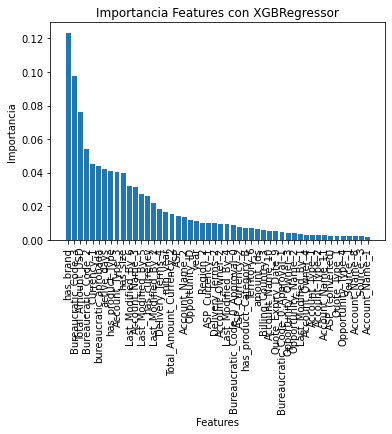

In [68]:
df = p.sort_values('value').nlargest(50, 'value')

plt.bar(df.feature, df.value, )
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con XGBRegressor')
plt.show()

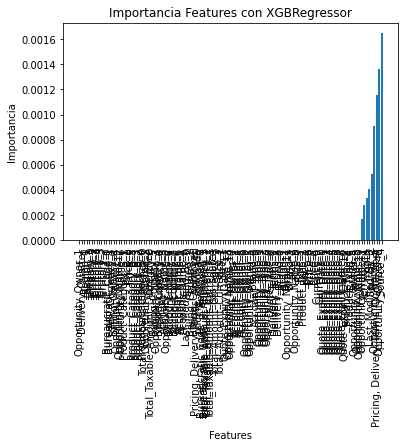

In [76]:
df = p.sort_values('value').nsmallest(X.shape[1]-50, 'value')

plt.bar(df.feature, df.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con XGBRegressor')
plt.show()

In [77]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5)


rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

loss = log_loss(y_test, preds)
print("Loss: %f" % (loss))

Loss: 1.089199


In [78]:
tree0 = rf_model.estimators_[0]

In [79]:
p = pd.DataFrame({'feature':X_train.columns, 'value':tree0.feature_importances_})
p = p.sort_values('value')

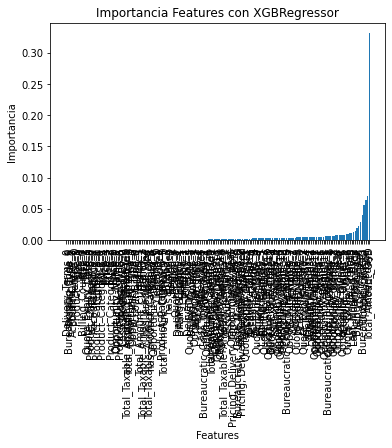

In [80]:
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con Random Forest')
plt.show()

In [67]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5)

rf_model.fit(trainX, y)
preds = rf_model.predict(testX)

In [68]:
preds.shape

(1567,)

In [99]:
prediccion = pd.DataFrame({'Opportunity_ID':testX.Opportunity_ID, 'Target':preds})
prediccion

,Opportunity_ID,Target
9348,10689,1.0
9349,10690,1.0
9350,10691,0.8
9351,10692,0.8
9352,10693,1.0
...,...,...
10927,12364,1.0
10928,12365,1.0
10929,12366,1.0
10930,12367,0.8


In [100]:
prediccion.to_csv('prediccion_random_forest_2', index=False)

In [ ]:
# Puede tardar mucho, los valores que me habian salido para menos features fueron:
# colsample_bytree = 0.5, 
# learning_rate = 0.1, 
# max_depth = 12, 
# alpha = 5, 
# n_estimators = 50, 

# Set the parameters by cross-validation
tuned_parameters = [{'colsample_bytree': [0.1,0.3,0.5],
                     'learning_rate': [0.1, 0.05],
                     'max_depth': [5,8,10,12],
                     'alpha': [5,10,15],
                     'n_estimators': [10,50],
                     'objective': ['binary:logistic'],
                     'eval_metric': ['logloss']}]

score = 'log_loss'
print('# Tuning hyper-parameters for XGBoost and Log loss')

X_train, X_test, y_train, y_test = \
    train_test_split(trainX, y, test_size=0.2, random_state=123)

xgb_reg = xgb.XGBRegressor()
clf = GridSearchCV(\
    xgb_reg, tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best Params:")
print(clf.best_params_ )
print()
print('Best Score:')
print(clf.best_score_)

In [93]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(trainX, y, test_size=0.15, random_state=123)

xgb_reg = xgb.XGBRegressor(objective = 'binary:logistic', \
                           colsample_bytree = 0.5, \
                           learning_rate = 0.1, \
                           max_depth = 12, \
                           alpha = 5, \
                           n_estimators = 50, \
                           subsample=0.5,\
                           eval_metric='logloss')
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
ll = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (ll))

Log Loss: 0.334466


In [94]:
p = pd.DataFrame({'feature':X_train.columns, 'value':xgb_reg.feature_importances_})
p = p.sort_values('value')

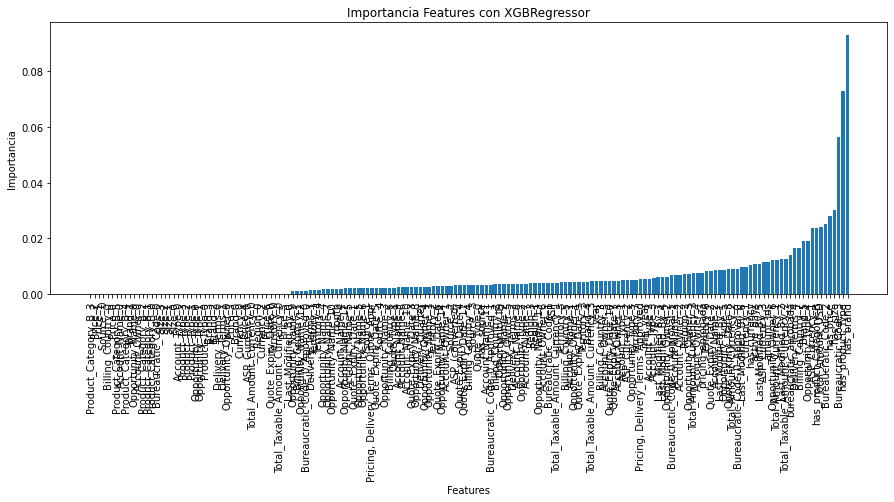

In [100]:
plt.figure(figsize=(15,5))
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con XGBRegressor')
plt.show()

In [96]:
xgb_reg = xgb.XGBRegressor(objective = 'binary:logistic', \
                           colsample_bytree = 0.5, \
                           learning_rate = 0.1, \
                           max_depth = 12, \
                           alpha = 5, \
                           n_estimators = 50, \
                           eval_metric='logloss')

xgb_reg.fit(trainX, y)
preds = xgb_reg.predict(testX)

In [85]:
preds.shape

(1567,)

In [86]:
prediccion = pd.DataFrame({'Opportunity_ID':testX.Opportunity_ID, 'Target':preds})
prediccion

,Opportunity_ID,Target
9348,10689,0.892960
9349,10690,0.615864
9350,10691,0.877243
9351,10692,0.685127
9352,10693,0.949561
...,...,...
10927,12364,0.941967
10928,12365,0.850251
10929,12366,0.833420
10930,12367,0.821295


In [87]:
prediccion.to_csv('prediccion_xgboost_7', index=False)